In [ ]:
!pip install chardet
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Detect the encoding of the CSV file
with open('SQLIV3_cleaned2.csv', 'rb') as f:

    result = chardet.detect(f.read())
# Read the CSV file into a pandas dataframe, using the detected encoding
df = pd.read_csv('SQLIV3_cleaned2.csv', sep=',', encoding=result['encoding'])

# Display the first rows of the dataframe
print(df)

                                                Sentence  Label
0                      " or pg_sleep  (  __TIME__  )  --      1
1      create user name identified by pass123 tempora...      1
2       AND 1  =  utl_inaddr.get_host_address   (    ...      1
3       select * from users where id  =  '1' or @ @1 ...      1
4       select * from users where id  =  1 or 1#"  ( ...      1
...                                                  ...    ...
30609              DELETE FROM door WHERE grow = 'small'      0
30610                               DELETE FROM tomorrow      0
30611                       SELECT wide ( s )  FROM west      0
30612       SELECT * FROM  ( SELECT slide FROM breath )       0
30613                           SELECT TOP 3 * FROM race      0

[30614 rows x 2 columns]


In [3]:
df


,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
...,...,...
30609,DELETE FROM door WHERE grow = 'small',0
30610,DELETE FROM tomorrow,0
30611,SELECT wide ( s ) FROM west,0
30612,SELECT * FROM ( SELECT slide FROM breath ),0


In [4]:
df.shape
df.head()


,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [5]:
# check for duplicate values
df.duplicated().sum()

12

In [6]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [7]:
## check for duplicat values after handling
df.duplicated().sum()

0

In [8]:
df.shape

(30602, 2)

In [9]:
df.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [10]:
df['Label'].value_counts()

Label
0    19260
1    11342
Name: count, dtype: int64

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_12740\91219722.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, ax=ax[1], palette=colors)
C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_12740\91219722.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Label', data=df, ax=ax[1], palette=colors)


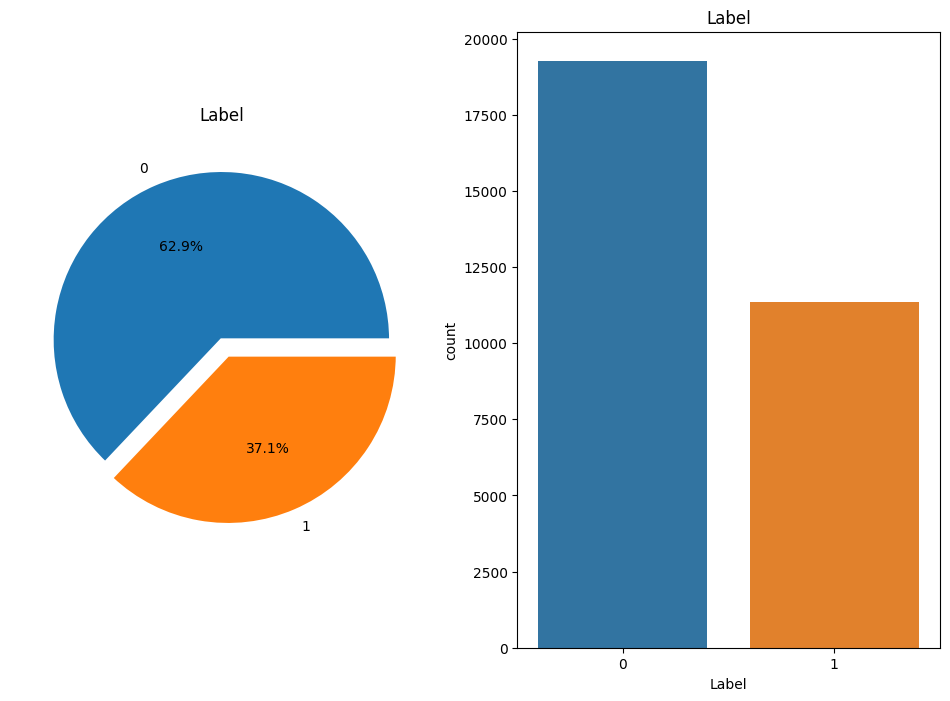

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 8))
colors = list(mcolors.TABLEAU_COLORS.values())
df['Label'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True}, colors=colors)

ax[0].set_title('Label')
ax[0].set_ylabel('')
sns.countplot(x='Label', data=df, ax=ax[1], palette=colors)
ax[1].set_title('Label')
plt.show()

In [ ]:
#convert a collection of text documents into a matrix of token
cv = CountVectorizer()


In [13]:
X = df['Sentence'].values

In [14]:
y = df['Label'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23 , shuffle=True)


In [17]:
# Appliquer TfidfVectorizer directement sur le texte brut

X_train = pd.Series(X_train).dropna().astype(str)
X_test = pd.Series(X_test).dropna().astype(str)
tfidf = TfidfVectorizer(max_features=3000)
X_train = tfidf.fit_transform(X_train)  # Transformer les textes bruts
X_test = tfidf.transform(X_test)


In [19]:
model = SVC(kernel='linear', C=1 ,probability= True)
#svc_linear_100 = SVC(kernel='linear', C=100)
#svc_linear_1000 = SVC(kernel='linear', C=1000)


#svc_rbf_1 = SVC(kernel='rbf', C=1)
#svc_rbf_100 = SVC(kernel='rbf', C=100)
#svc_rbf_1000 = SVC(kernel='rbf', C=1000)




In [20]:
#
   # 'SVC_L_1' : svc_linear_1,
    #'SVC_L_100' : svc_linear_100,
    #'SVC_L_1000' : svc_linear_1000,
    #'SVC_RBF_1' : svc_rbf_1,
    #'SVC_RBF_100' : svc_rbf_100,
    #'SVC_RBF_1000' : svc_rbf_1000,

model.fit(X_train,y_train)

SVC(C=1, kernel='linear', probability=True)

In [21]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [22]:
accuracy_scores = []
precision_scores = []


current_accuracy,current_precision = train_classifier(model, X_train,y_train,X_test,y_test)
    
print("For svm with linear kernal c=1  ")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
    
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)

For svm with linear kernal c=1  
Accuracy -  0.9944453520666557
Precision -  0.9973333333333333


In [23]:
model.score(X_test , y_test)

0.9944453520666557

In [24]:
# Fonction pour prédire si un texte est sqli ou non
def predict_message(message):
       # Preprocess the message
      # Ensure you define this function for text preprocessing
    message_vectorized = tfidf.transform([message]) # Convert to dense array
    prediction = model.predict(message_vectorized)  # Make the prediction
    probas = model.predict_proba(message_vectorized)  # Get the probabilities
    label = "sql injection" if prediction[0] == 1 else "not sql injection"  # Assign label based on prediction
    return label, probas[0]



In [ ]:


# Définition du chemin relatif du fichier CSV
dataset_path = "sqliv2.csv"

# Vérification de l'existence du fichier

        # Détection de l'encodage du fichier
        with open(dataset_path, 'rb') as f:
            result = chardet.detect(f.read())

        # Lecture du fichier CSV avec l'encodage détecté
        df_original = pd.read_csv(dataset_path, sep=',', encoding=result['encoding'], header=None, names=["payload", "label"], on_bad_lines='skip')
        
        # Vérification et conversion de la colonne label en numérique
        df_original['label'] = pd.to_numeric(df_original['label'], errors='coerce')
        
        # Suppression des lignes avec des valeurs NaN dans label
        df_original = df_original.dropna(subset=['label'])
        
        # Suppression des doublons en gardant uniquement le premier
        df_original = df_original.drop_duplicates(subset=["payload"], keep="first")
        
        # ✅ GARDER TOUTES les lignes avec label == 1 (PAS d'échantillonnage)
        df2 = df_original[df_original['label'] == 1]
        
        # Afficher
        if not df2.empty:
            print(df2)
        else:
            print("Aucune donnée avec label = 1 trouvée dans le fichier.")
    


                                                 payload  label
1                          " or pg_sleep ( __TIME__ ) --    1.0
2      create user name identified by pass123 tempora...    1.0
3                                                    %29    1.0
4      ' AND 1 = utl_inaddr.get_host_address  (  (  S...    1.0
5       select * from users where id = '1' or @ @1 = ...    1.0
...                                                  ...    ...
14452  1" )  and 8514 =  ( select count ( * )  from d...    1.0
14453  1  )  )   as rwsn where 9946 = 9946 or extract...    1.0
14454  1'+ ( select wjpc where 5943 = 5943 and make_s...    1.0
14455  1%'  )  )   ( select  ( case when  ( 4587 = 45...    1.0
14456                     -9456%'  )  )   )  order by 1#    1.0

[11424 rows x 2 columns]


In [26]:
# 1. Supprimer les lignes contenant des valeurs NaN dans 'payload'
df2 = df2.dropna(subset=['payload'])

# 2. Application de la fonction de prédiction sur df2
df2[['prediction', 'probability']] = df2['payload'].apply(lambda x: pd.Series(predict_message(x)))

# 3. Compter les SQL injections détectées
sql_injection_count = (df2['prediction'] == "sql injection").sum()
print(f"Nombre de SQL Injections détectées : {sql_injection_count} sur {len(df2)}")


# 4. Calculer les métriques : Precision, Recall, F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

# Remapper les labels en 0 / 1 pour le calcul
# Rappel : "sql injection" -> 1, "not sql injection" -> 0
df2['prediction_binary'] = df2['prediction'].map({"sql injection": 1, "not sql injection": 0})
df2['label_binary'] = df2['label'].astype(int)  # normaliser ton label original en entier

# Calcul des scores
precision = precision_score(df2['label_binary'], df2['prediction_binary'])
recall = recall_score(df2['label_binary'], df2['prediction_binary'])
f1 = f1_score(df2['label_binary'], df2['prediction_binary'])
accuracy = accuracy_score(df2['label_binary'], df2['prediction_binary'])

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Nombre de SQL Injections détectées : 11232 sur 11424
Precision: 1.0000
Recall: 0.9832
F1-Score: 0.9915
Accuracy: 0.9832


In [27]:
import os
import pandas as pd
import chardet

# Définition du chemin relatif du fichier CSV
dataset_path = "sqliv2.csv"

# Vérification de l'existence du fichier
if os.path.exists(dataset_path):
    try:
        # Détection de l'encodage du fichier
        with open(dataset_path, 'rb') as f:
            result = chardet.detect(f.read())

        # Lecture du fichier CSV avec l'encodage détecté
        df_original = pd.read_csv(dataset_path, sep=',', encoding=result['encoding'], header=None, names=["payload", "label"], on_bad_lines='skip')
        
        # Vérification et conversion de la colonne label en numérique
        df_original['label'] = pd.to_numeric(df_original['label'], errors='coerce')
        
        # Suppression des lignes avec des valeurs NaN dans label
        df_original = df_original.dropna(subset=['label'])
        
        # Suppression des doublons en gardant uniquement le premier pour chaque 'payload'
        df_original = df_original.drop_duplicates(subset=["payload"], keep="first")
        
        
        
        # GARDER TOUTES les lignes avec label == 0 pour df3
        df3 = df_original[df_original['label'] == 0]
        
        
        
        # Afficher df3 (avec label == 0)
        if not df3.empty:
            print("\nDataFrame df3 (label == 0):")
            print(df3)
        else:
            print("Aucune donnée avec label = 0 trouvée dans le fichier.")
            
    except UnicodeDecodeError:
        print("Erreur d'encodage lors de la lecture du fichier. Essayez un autre encodage comme 'latin1' ou 'utf-16'.")
else:
    print(f"Le fichier {dataset_path} n'existe pas.")



DataFrame df3 (label == 0):
                                                 payload  label
951                                                  NaN    0.0
952     When I &apos;m finished patient write-ups nig...    0.0
953     Thanks mooring basin front terminal , sunken ...    0.0
954     Geisingen Kirchen-Hausen first documented tog...    0.0
955     However , visitors marvel two ornate church t...    0.0
...                                                  ...    ...
33756                                             syrett    0.0
33757                                   arrechea bellveh    0.0
33758                                               1664    0.0
33759                                           almaluez    0.0
33760                                          f6lo40r06    0.0

[22302 rows x 2 columns]


In [28]:
import os
import pandas as pd
import chardet
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Définition du chemin relatif du fichier CSV
dataset_path = "sqliv2.csv"

# Vérification de l'existence du fichier
if os.path.exists(dataset_path):
    try:
        # Détection de l'encodage du fichier
        with open(dataset_path, 'rb') as f:
            result = chardet.detect(f.read())

        # Lecture du fichier CSV avec l'encodage détecté
        df_original = pd.read_csv(dataset_path, sep=',', encoding=result['encoding'],
                                  header=None, names=["payload", "label"], on_bad_lines='skip')
        
        # Vérification et conversion de la colonne label en numérique
        df_original['label'] = pd.to_numeric(df_original['label'], errors='coerce')
        
        # Suppression des lignes avec des valeurs NaN dans label
        df_original = df_original.dropna(subset=['label'])
        
        # Suppression des doublons en gardant uniquement le premier pour chaque 'payload'
        df_original = df_original.drop_duplicates(subset=["payload"], keep="first")
        
        # ✅ GARDER TOUTES les lignes avec label == 0 pour df3
        df3 = df_original[df_original['label'] == 0]
        
        # Traitement pour df3 (non-spam)

        # 1. Supprimer les lignes contenant des valeurs NaN dans 'payload'
        df3 = df3.dropna(subset=['payload'])

        # 2. Application de la fonction de prédiction sur df3
        df3[['prediction', 'probability']] = df3['payload'].apply(lambda x: pd.Series(predict_message(x)))

        # 3. Compter les non-spams détectés (ici, label == 0 et prédiction == "not sql injection")
        non_spam_count = (df3['prediction'] == "not sql injection").sum()
        print(f"Nombre de non-spams détectés : {non_spam_count} sur {len(df3)}")

        # 4. Calculer les métriques : Precision, Recall, F1-Score
        # Remapper les labels en 0 / 1 pour le calcul
        # Rappel : "sql injection" -> 1, "not sql injection" -> 0
        df3['prediction_binary'] = df3['prediction'].map({"sql injection": 1, "not sql injection": 0})
        df3['label_binary'] = df3['label'].astype(int)  # normaliser ton label original en entier

        # Calcul des scores
        precision = precision_score(df3['label_binary'], df3['prediction_binary'], zero_division=0, pos_label=0)
        recall = recall_score(df3['label_binary'], df3['prediction_binary'], zero_division=0, pos_label=0)
        f1 = f1_score(df3['label_binary'], df3['prediction_binary'], zero_division=0, pos_label=0)
        accuracy = accuracy_score(df3['label_binary'], df3['prediction_binary'])

        print(f"Precision (pour label=0 comme positif): {precision:.4f}")
        print(f"Recall (pour label=0 comme positif): {recall:.4f}")
        print(f"F1-Score (pour label=0 comme positif): {f1:.4f}")
        print(f"Accuracy: {accuracy:.4f}")

    except UnicodeDecodeError:
        print("Erreur d'encodage lors de la lecture du fichier. Essayez un autre encodage comme 'latin1' ou 'utf-16'.")
else:
    print(f"Le fichier {dataset_path} n'existe pas.")


Nombre de non-spams détectés : 22263 sur 22301
Precision (pour label=0 comme positif): 1.0000
Recall (pour label=0 comme positif): 0.9983
F1-Score (pour label=0 comme positif): 0.9991
Accuracy: 0.9983


In [29]:
print(df3['label'].value_counts())


label
0.0    22301
Name: count, dtype: int64


In [30]:
import os
import pandas as pd
import chardet
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Définition du chemin relatif du fichier CSV
dataset_path = "sqliv2.csv"

# Vérification de l'existence du fichier
if os.path.exists(dataset_path):
    try:
        # Détection de l'encodage du fichier
        with open(dataset_path, 'rb') as f:
            result = chardet.detect(f.read())

        # Lecture du fichier CSV avec l'encodage détecté
        df_original = pd.read_csv(dataset_path, sep=',', encoding=result['encoding'],
                                  header=None, names=["payload", "label"], on_bad_lines='skip')
        
        # Vérification et conversion de la colonne label en numérique
        df_original['label'] = pd.to_numeric(df_original['label'], errors='coerce')
        
        # Suppression des lignes avec des valeurs NaN dans label
        df_original = df_original.dropna(subset=['label'])
        
        # Suppression des doublons en gardant uniquement le premier pour chaque 'payload'
        df_original = df_original.drop_duplicates(subset=["payload"], keep="first")
        
        # ✅ GARDER TOUTES les lignes avec label == 0 pour df3
        df3 = df_original[df_original['label'] == 0]
        
        # Traitement pour df3 (non-spam)

        # 1. Supprimer les lignes contenant des valeurs NaN dans 'payload'
        df3 = df3.dropna(subset=['payload'])

        # 2. Application de la fonction de prédiction sur df3
        df3[['prediction', 'probability']] = df3['payload'].apply(lambda x: pd.Series(predict_message(x)))

        # 3. Compter les non-spams détectés (ici, label == 0 et prédiction == "not sql injection")
        non_spam_count = (df3['prediction'] == "not sql injection").sum()
        print(f"Nombre de non-spams détectés : {non_spam_count} sur {len(df3)}")

        # 4. Calculer les métriques : Precision, Recall, F1-Score
        # Remapper les labels en 0 / 1 pour le calcul
        # Rappel : "sql injection" -> 1, "not sql injection" -> 0
        df3['prediction_binary'] = df3['prediction'].map({"sql injection": 1, "not sql injection": 0})
        df3['label_binary'] = df3['label'].astype(int)  # normaliser ton label original en entier

        # Calcul des scores
        precision = precision_score(df3['label_binary'], df3['prediction_binary'], zero_division=0, pos_label=0)
        recall = recall_score(df3['label_binary'], df3['prediction_binary'], zero_division=0, pos_label=0)
        f1 = f1_score(df3['label_binary'], df3['prediction_binary'], zero_division=0, pos_label=0)
        accuracy = accuracy_score(df3['label_binary'], df3['prediction_binary'])

        print(f"Precision (pour label=0 comme positif): {precision:.4f}")
        print(f"Recall (pour label=0 comme positif): {recall:.4f}")
        print(f"F1-Score (pour label=0 comme positif): {f1:.4f}")
        print(f"Accuracy: {accuracy:.4f}")

    except UnicodeDecodeError:
        print("Erreur d'encodage lors de la lecture du fichier. Essayez un autre encodage comme 'latin1' ou 'utf-16'.")
else:
    print(f"Le fichier {dataset_path} n'existe pas.")


Nombre de non-spams détectés : 22263 sur 22301
Precision (pour label=0 comme positif): 1.0000
Recall (pour label=0 comme positif): 0.9983
F1-Score (pour label=0 comme positif): 0.9991
Accuracy: 0.9983
